# EIO - Zadanie 3 (K-NN)

Autor: Dariusz Max Adamski

Data oddania: 2020-11-04

---

You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, Normalizer
from tqdm.notebook import tqdm

sns.set_style('darkgrid')
plt.rc('figure', figsize=(14, 8), dpi=200)

In [2]:
df = pd.read_csv('winequality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,poor
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,poor
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,poor
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,poor
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,poor
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,poor


First, I split the dataset into features and class columns.

In [3]:
X = df[df.columns[:-1]]
y = df['quality']

Next, I split the dataset into the training (80%) and test (20%) datasets.

I also use stratification and shuffling.

Finally, I inspect the shapes of the arrays to verify the split.

In [4]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y, shuffle=True)
print('train', X_tr.shape, y_tr.shape)
print('test ', X_te.shape, y_te.shape)

train (1279, 11) (1279,)
test  (320, 11) (320,)


Before preprocessing I will plot the training dataset.

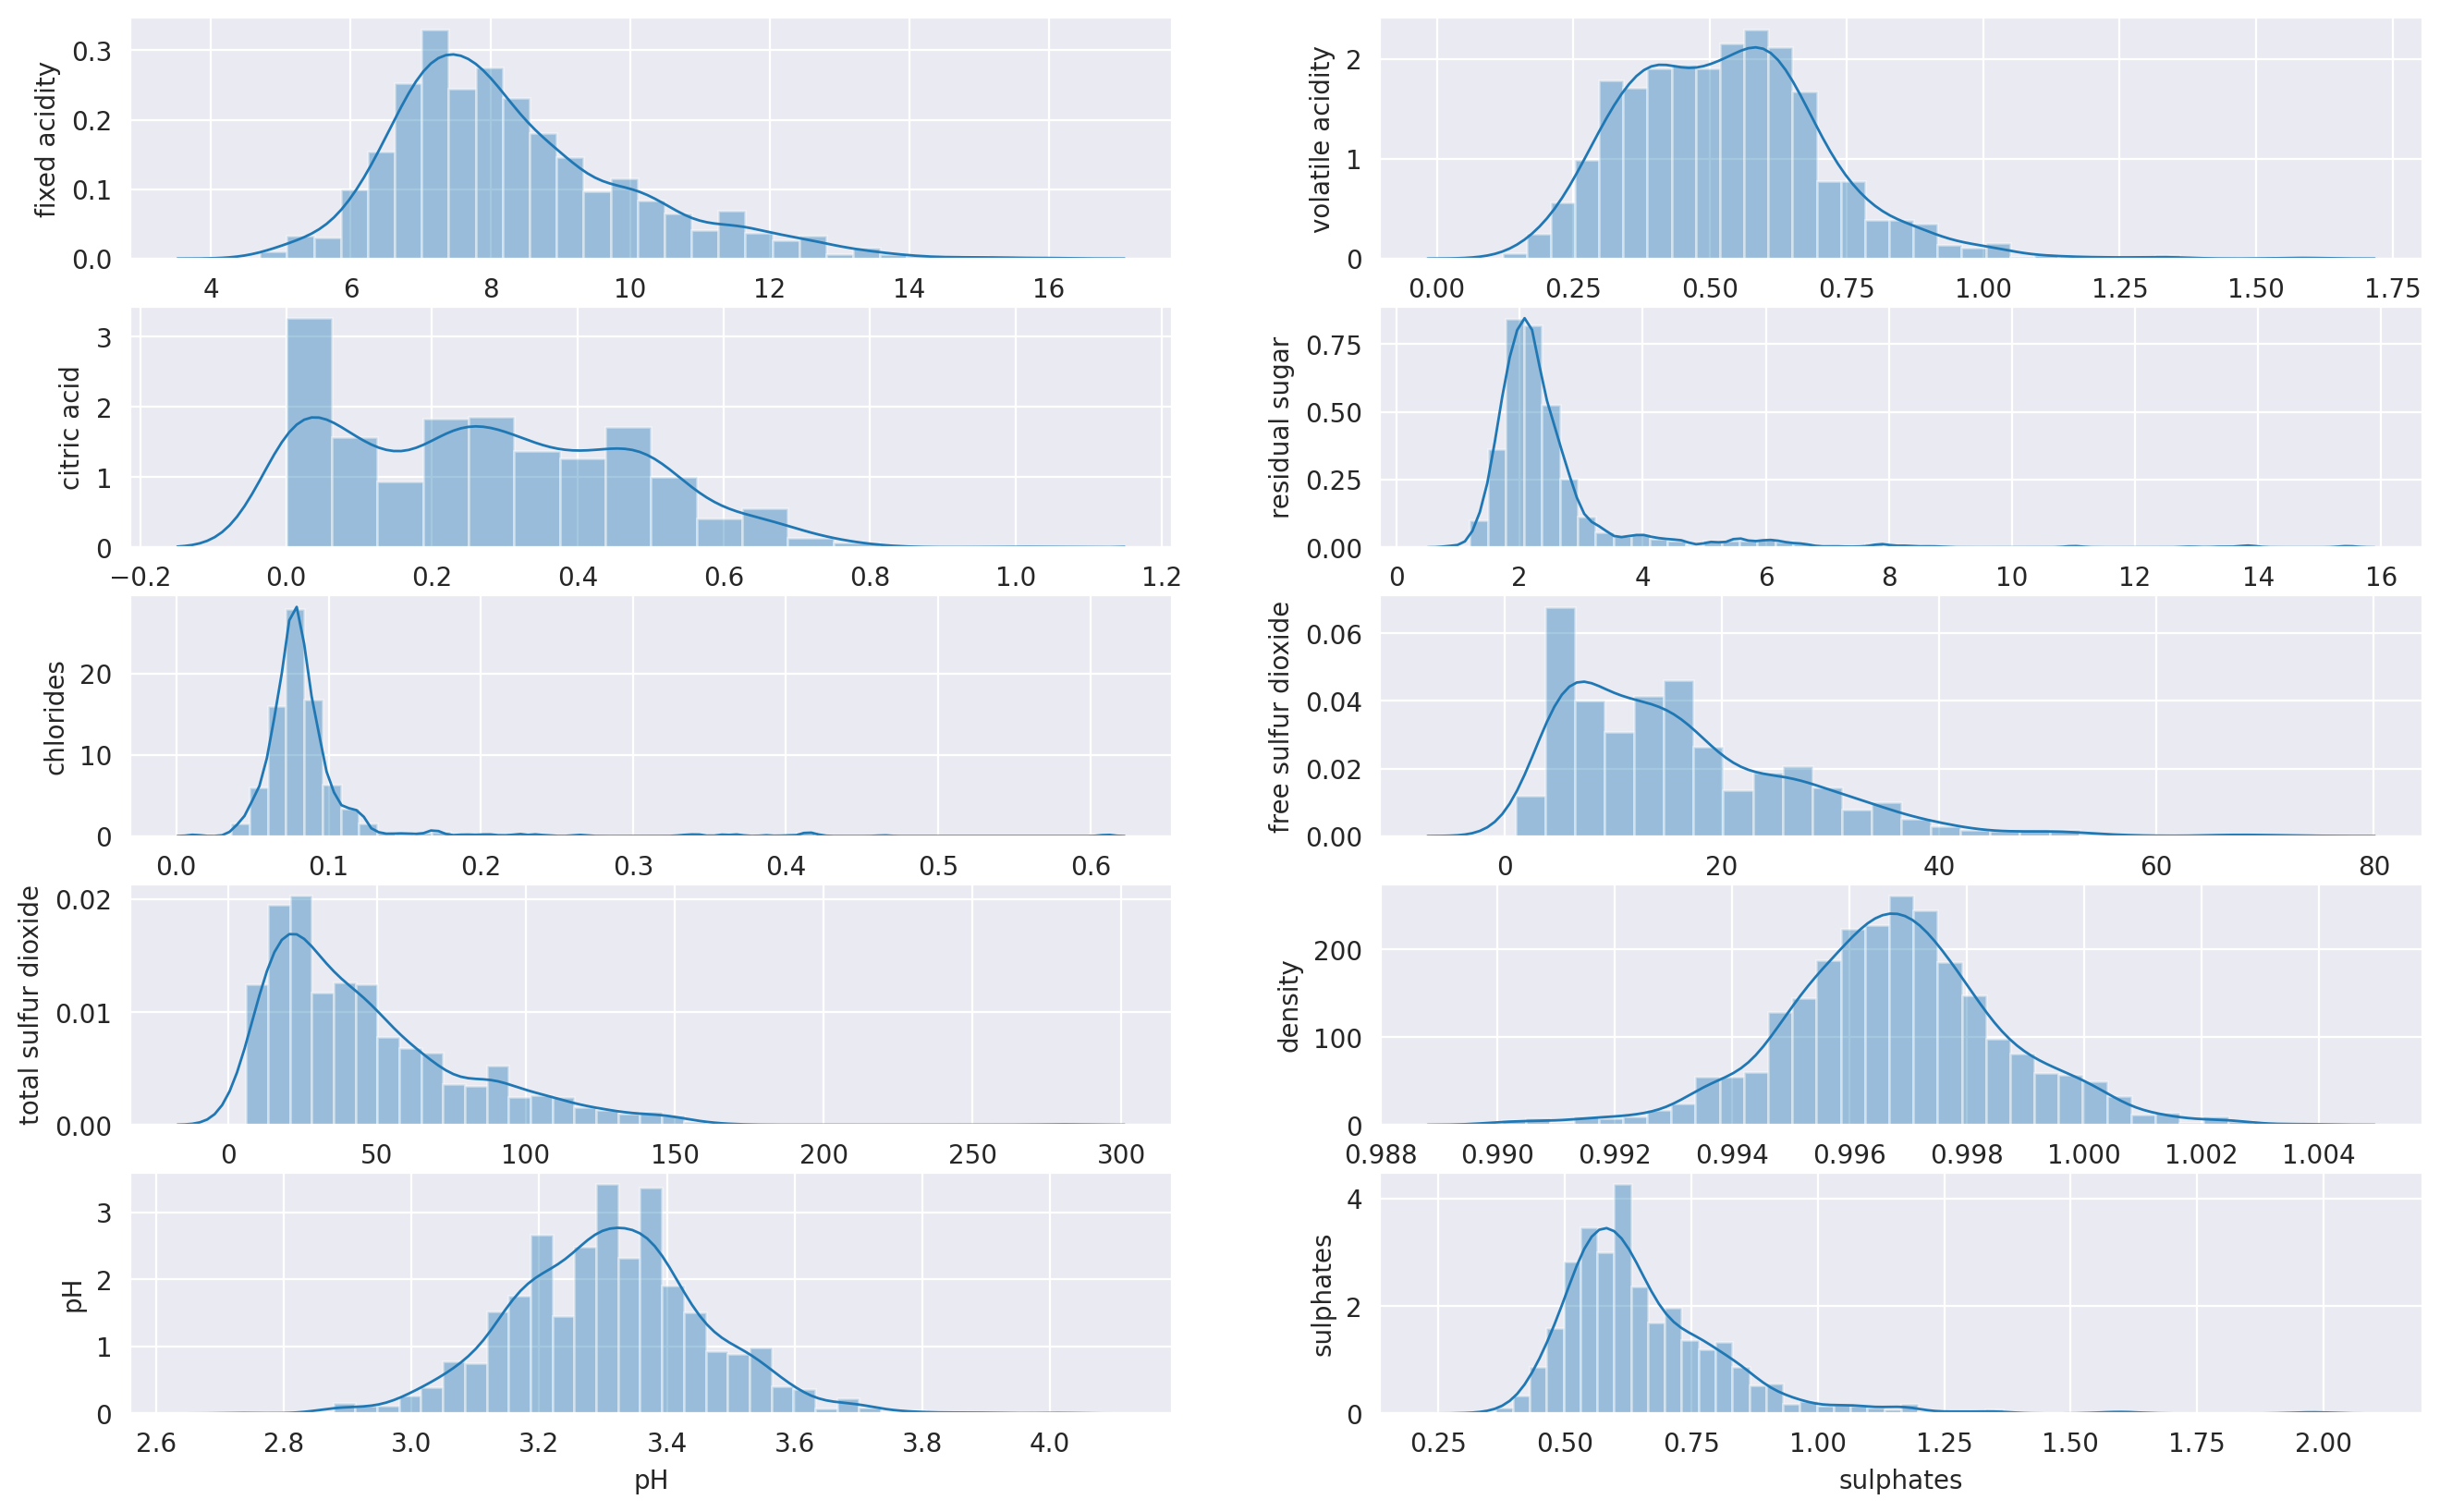

In [5]:
cols = X.columns[:-1]
fig, axs = plt.subplots(nrows=len(cols)//2, ncols=2, figsize=(16, 10))
axs = axs.reshape(-1)
for col, ax in zip(cols, axs):
    sns.distplot(X_tr[col], ax=ax)
    ax.set_ylabel(col)
plt.show()

For preprocessing, I standardize the data with the `StandardScaler`, and then plot the training dataset after standarization.

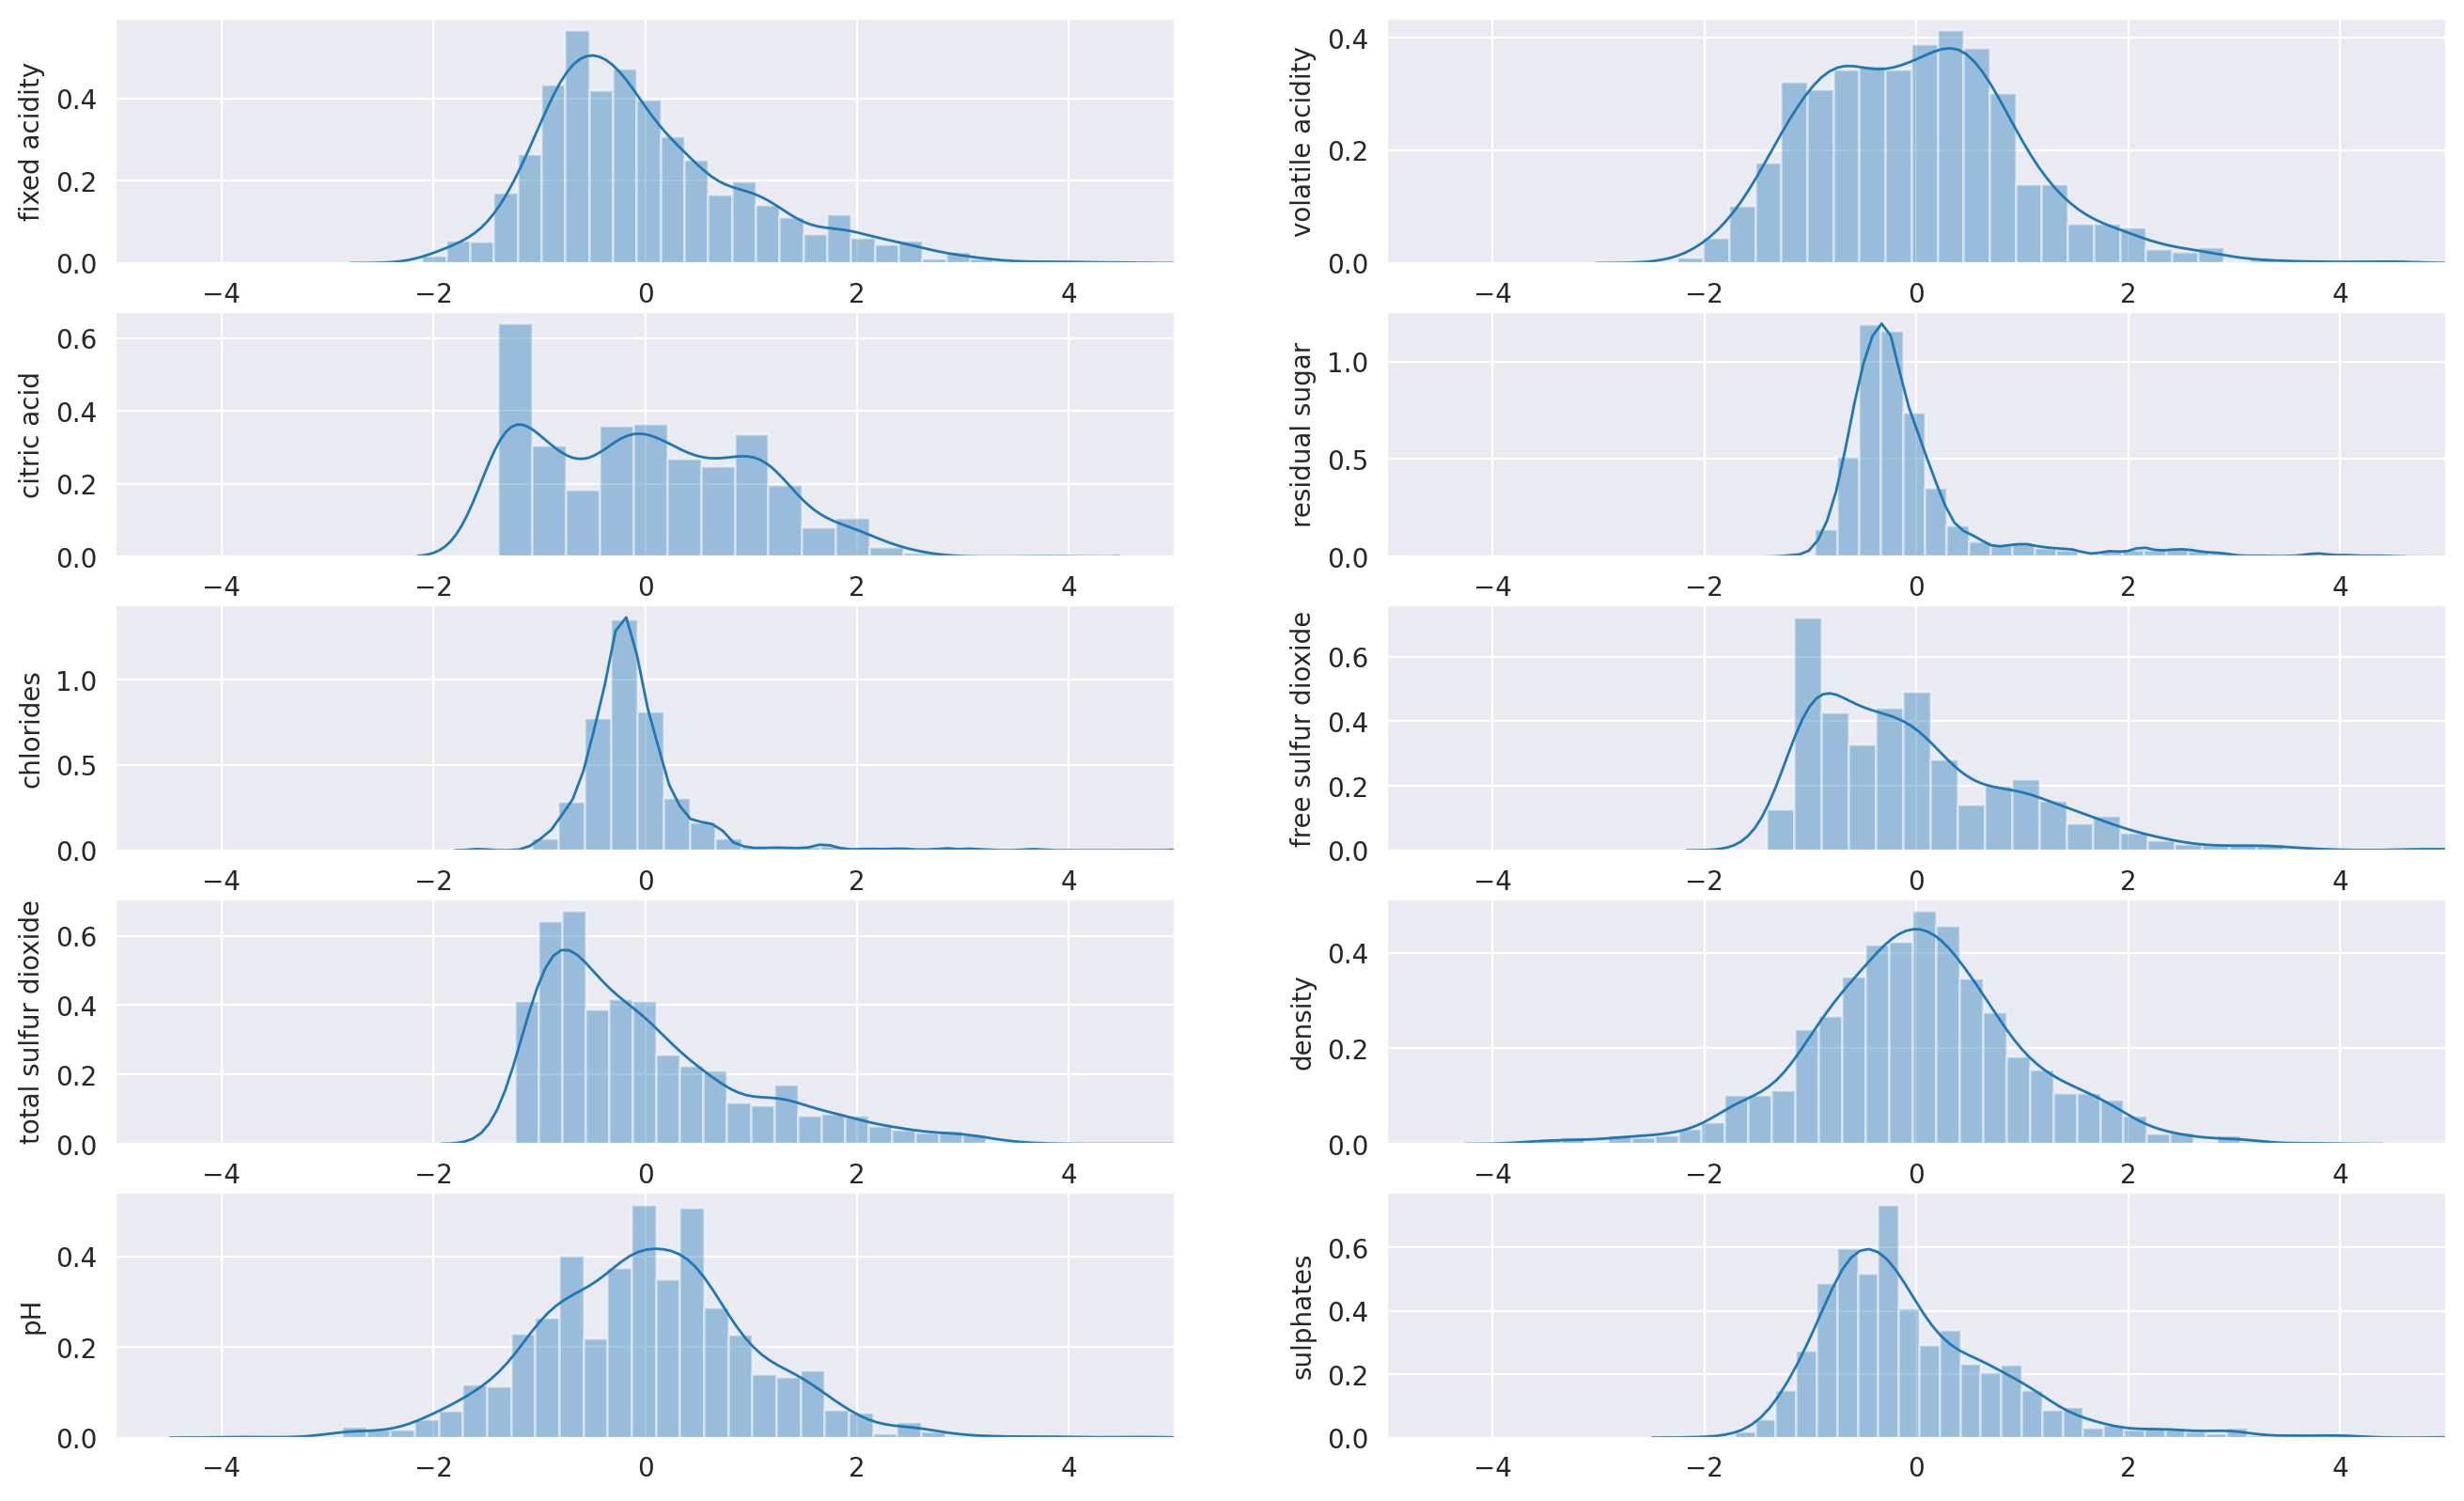

In [6]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.fit_transform(X_te)

cols = X.columns[:-1]
fig, axs = plt.subplots(nrows=len(cols)//2, ncols=2, figsize=(16, 10))
axs = axs.reshape(-1)
for i, (col, ax) in enumerate(zip(cols, axs)):
    sns.distplot(X_tr[:,i], ax=ax)
    ax.set_ylabel(col)
    ax.set_xlim(-5, 5)
plt.show()

I will search for the best parameter `k` of the K-NN classifier with 10-fold cross validation, measuring the mean accuracy score.

After trying different values of `k`, I chose the one which resulted in the highest accuracy.

The best value of `k` is 1.


best k =  1


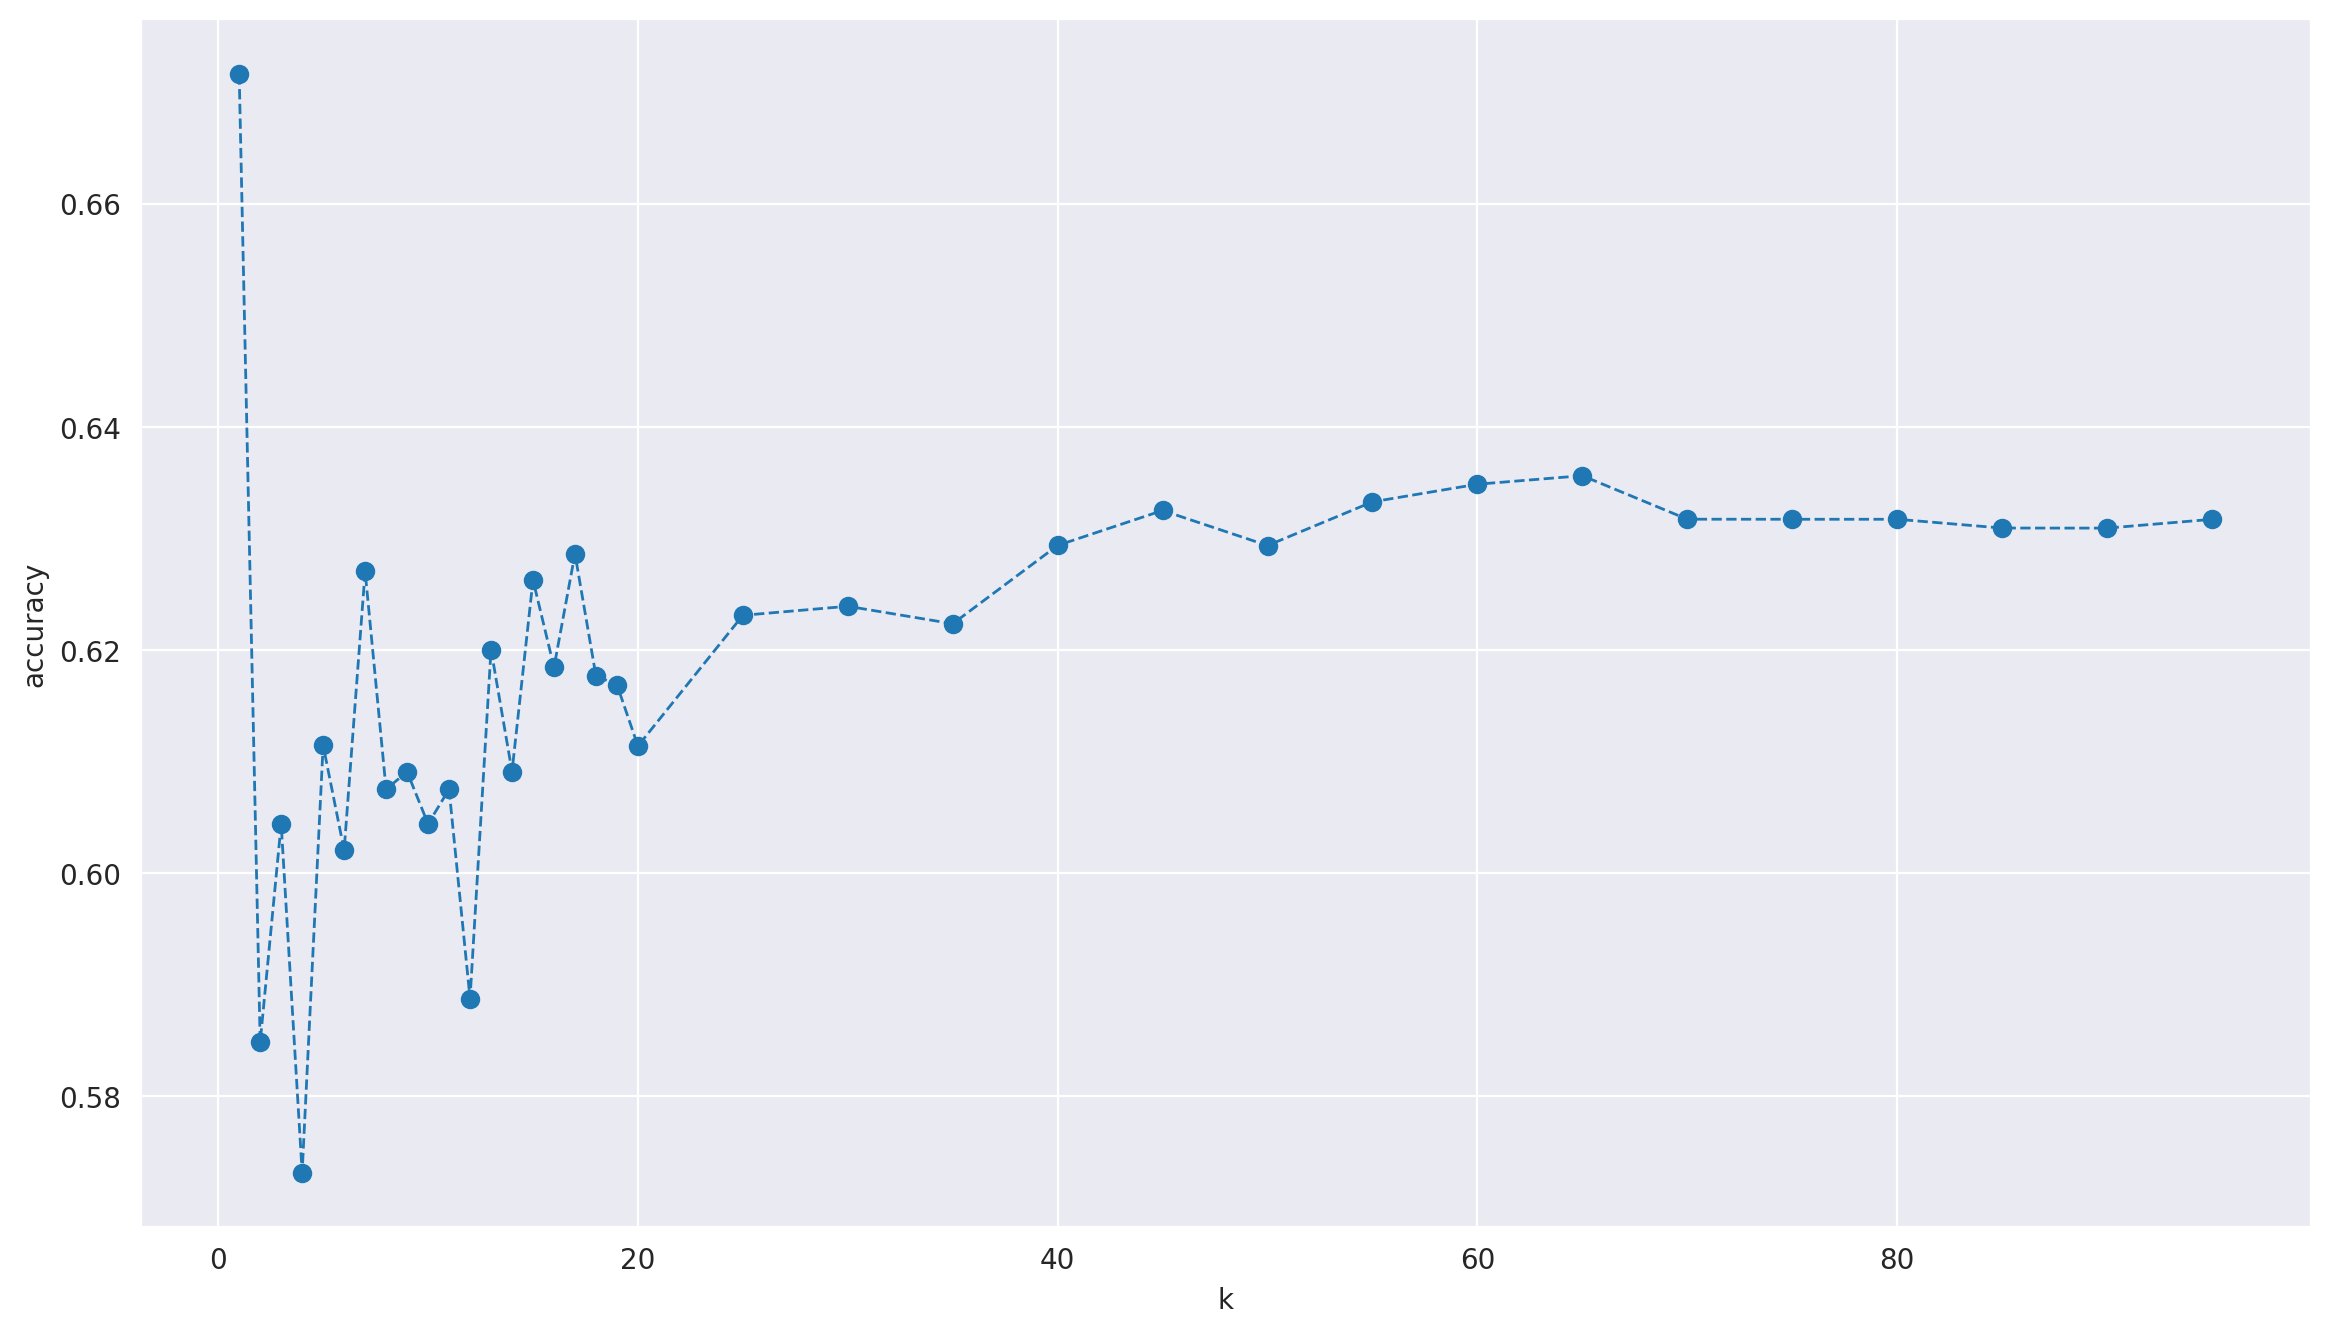

In [7]:
def knn_score_cv(k, cv=10, metric='accuracy'):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_validate(knn, X_tr, y_tr, cv=cv, scoring=metric)
    score = cv['test_score']
    return np.mean(score)

all_k  = list(range(1, 20)) + list(range(20, 100, 5))
scores = np.array([(k, knn_score_cv(k)) for k in tqdm(all_k)])
best_k = int(max(scores, key=lambda x: x[1])[0])
print('best k = ', best_k)
plt.plot(scores[:,0], scores[:,1], ls='--', marker='o')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()

Lastly, using the chosen value `k`, I will train the final `K-NN` classifier and compute the classification accuracy on the test dataset.

In [8]:
clas = KNeighborsClassifier(n_neighbors=best_k)
clas.fit(X_tr, y_tr)
Y_te = clas.predict(X_te)
acc = accuracy_score(Y_te, y_te)
print(f'accuracy = {acc*100:.4f}%')

accuracy = 66.8750%
